In [10]:
import VNA_data_read_local as vdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
def single_loader(path): 
    #folder_path = '/Users/FTS/Desktop/whispering_gallery/'
    data = pd.read_csv(path)
    data['Complex (decimal)'] = data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    return data

In [12]:
BL_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-26-52.txt')
BL_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-28-35.txt')
BL_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-30-10.txt')
BL_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-31-21.txt')
BL_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-33-59.txt')
BL_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-35-32.txt')

disk_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-24-48.txt')
disk_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-22-45.txt')
disk_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-15-24.txt')
disk_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-16-55.txt')
disk_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-18-22.txt')
disk_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-20-13.txt')

In [23]:
def plotter(baseline, disk):
        
    fig, ax = plt.subplots(3, 1, figsize = (20,25))
    
    ax[0].set_title('21 Baseline')
    ax[0].plot(1e-9*baseline['Freq (Hz)'], 20*np.log10(np.abs(baseline['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
    ax[0].legend()
    ax[0].set_ylim(np.min(20*np.log10(np.abs(disk['Complex (decimal)']))), np.max(20*np.log10(np.abs(baseline['Complex (decimal)'])))+0.5)

    ax[1].set_title('S21 Comparison')
    ax[1].plot(1e-9*baseline['Freq (Hz)'], 20*np.log10(np.abs(baseline['Complex (decimal)'])), label = '(strip) baseline', color = 'red')
    ax[1].plot(1e-9*disk['Freq (Hz)'], 20*np.log10(np.abs(disk['Complex (decimal)'])), label = 'disk + strip')
    ax[1].legend()
                
    ax[2].set_title('S21, Baseline Subtracted')
    ax[2].plot(1e-9*baseline['Freq (Hz)'], 
                20*np.log10(np.abs(disk['Complex (decimal)']))-20*np.log10(np.abs(baseline['Complex (decimal)'])), 
                label = '(disk + strip) - baseline', color = 'orange')
    ax[2].legend()
    plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')
    #plt.suptitle('Alumina Disk-Microstrip WGM Transmission Testing', fontsize = 28)
    print(f'{baseline["Freq (Hz)"].iloc[0]}' + ' to ' + f'{baseline["Freq (Hz)"].iloc[-1]}')


3960000000.0 to 4920000000.0


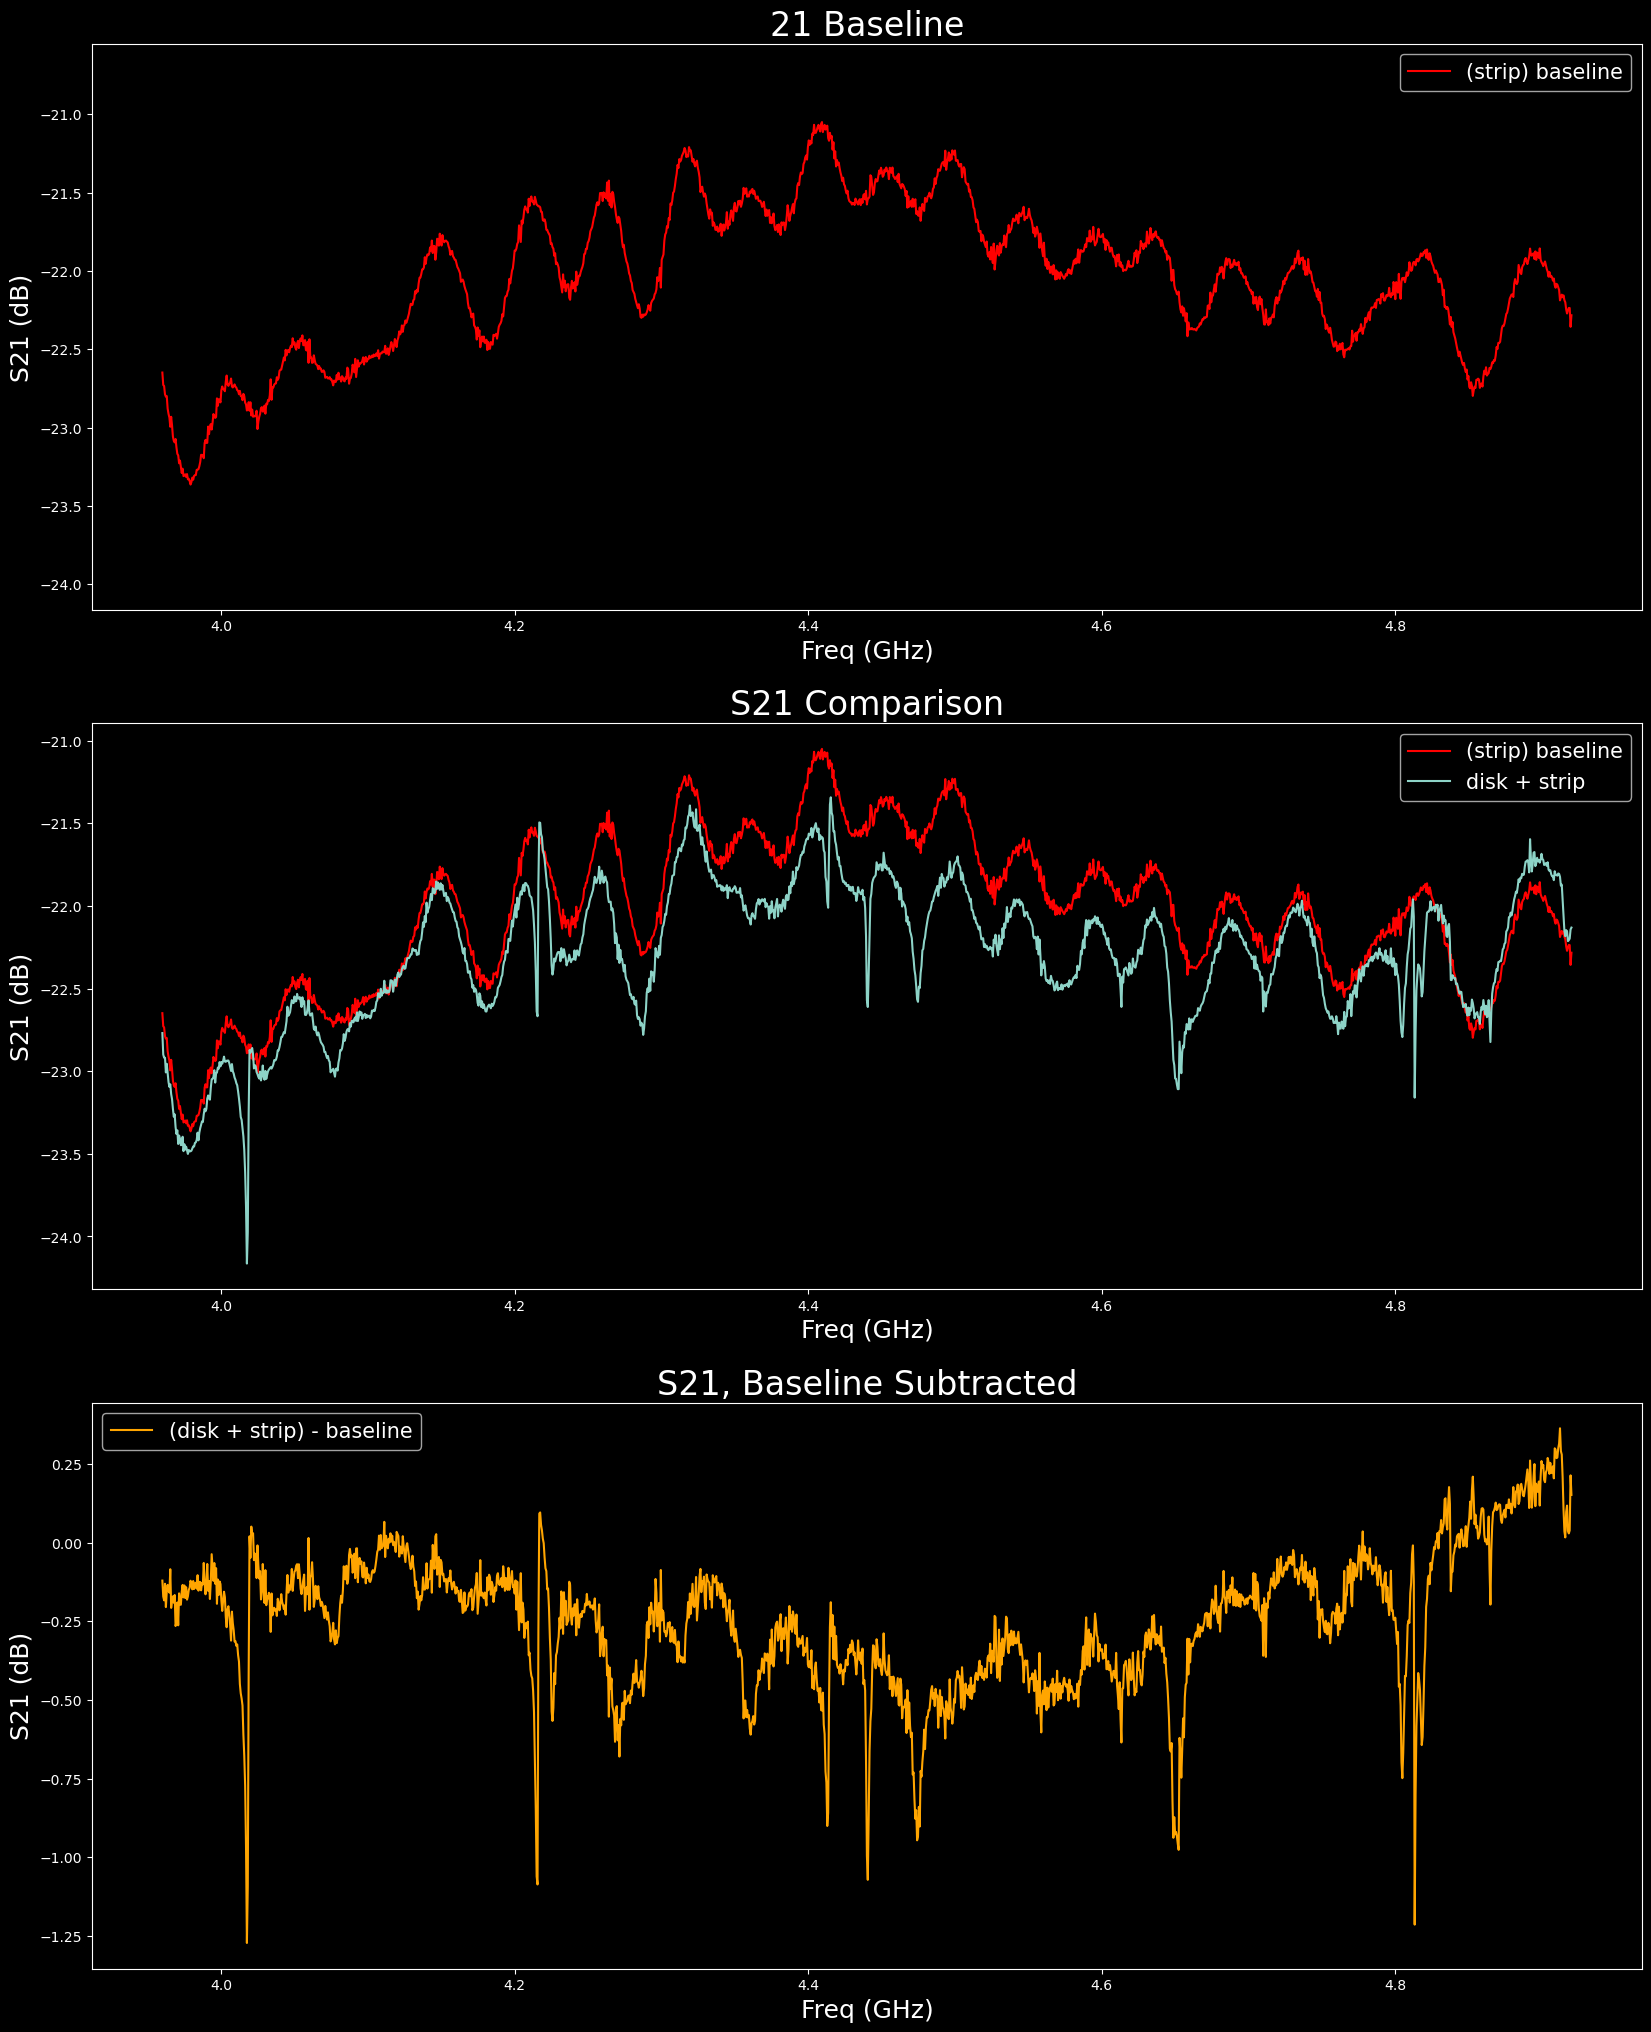

In [26]:
plotter(BL_3p96_4p92, disk_3p96_4p92)

6040000000.0 to 7000000000.0


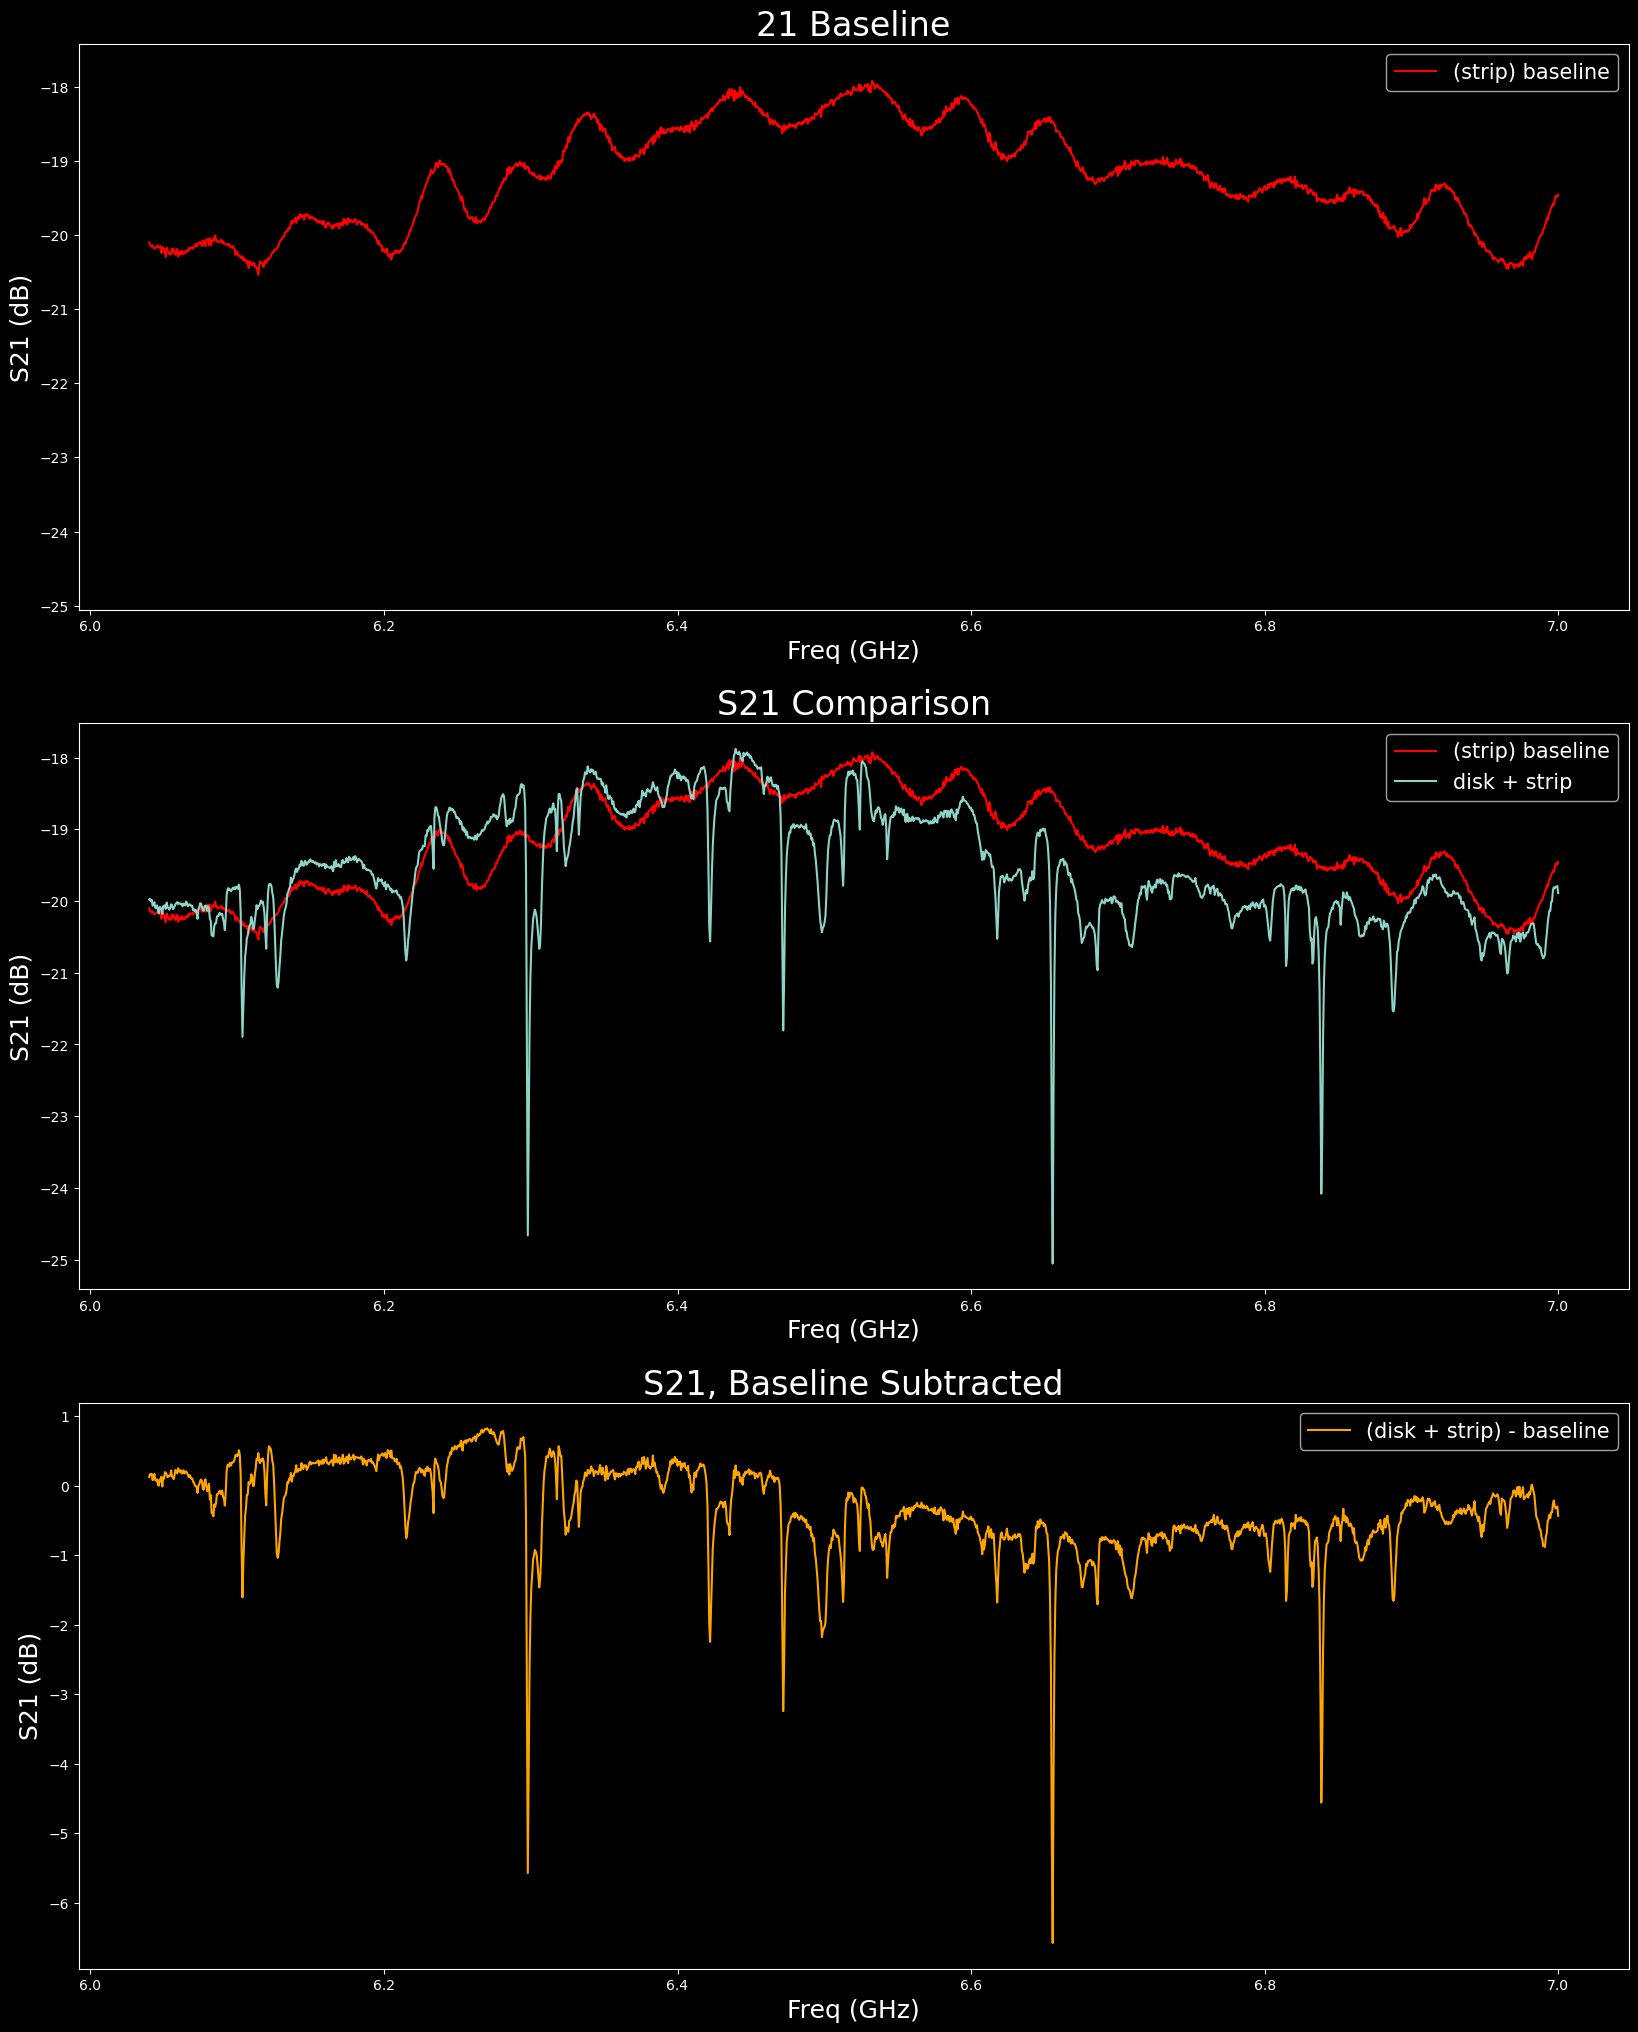

In [27]:
plotter(BL_6p04_7p0, disk_6p04_7p0)

7000000000.0 to 7960000000.0


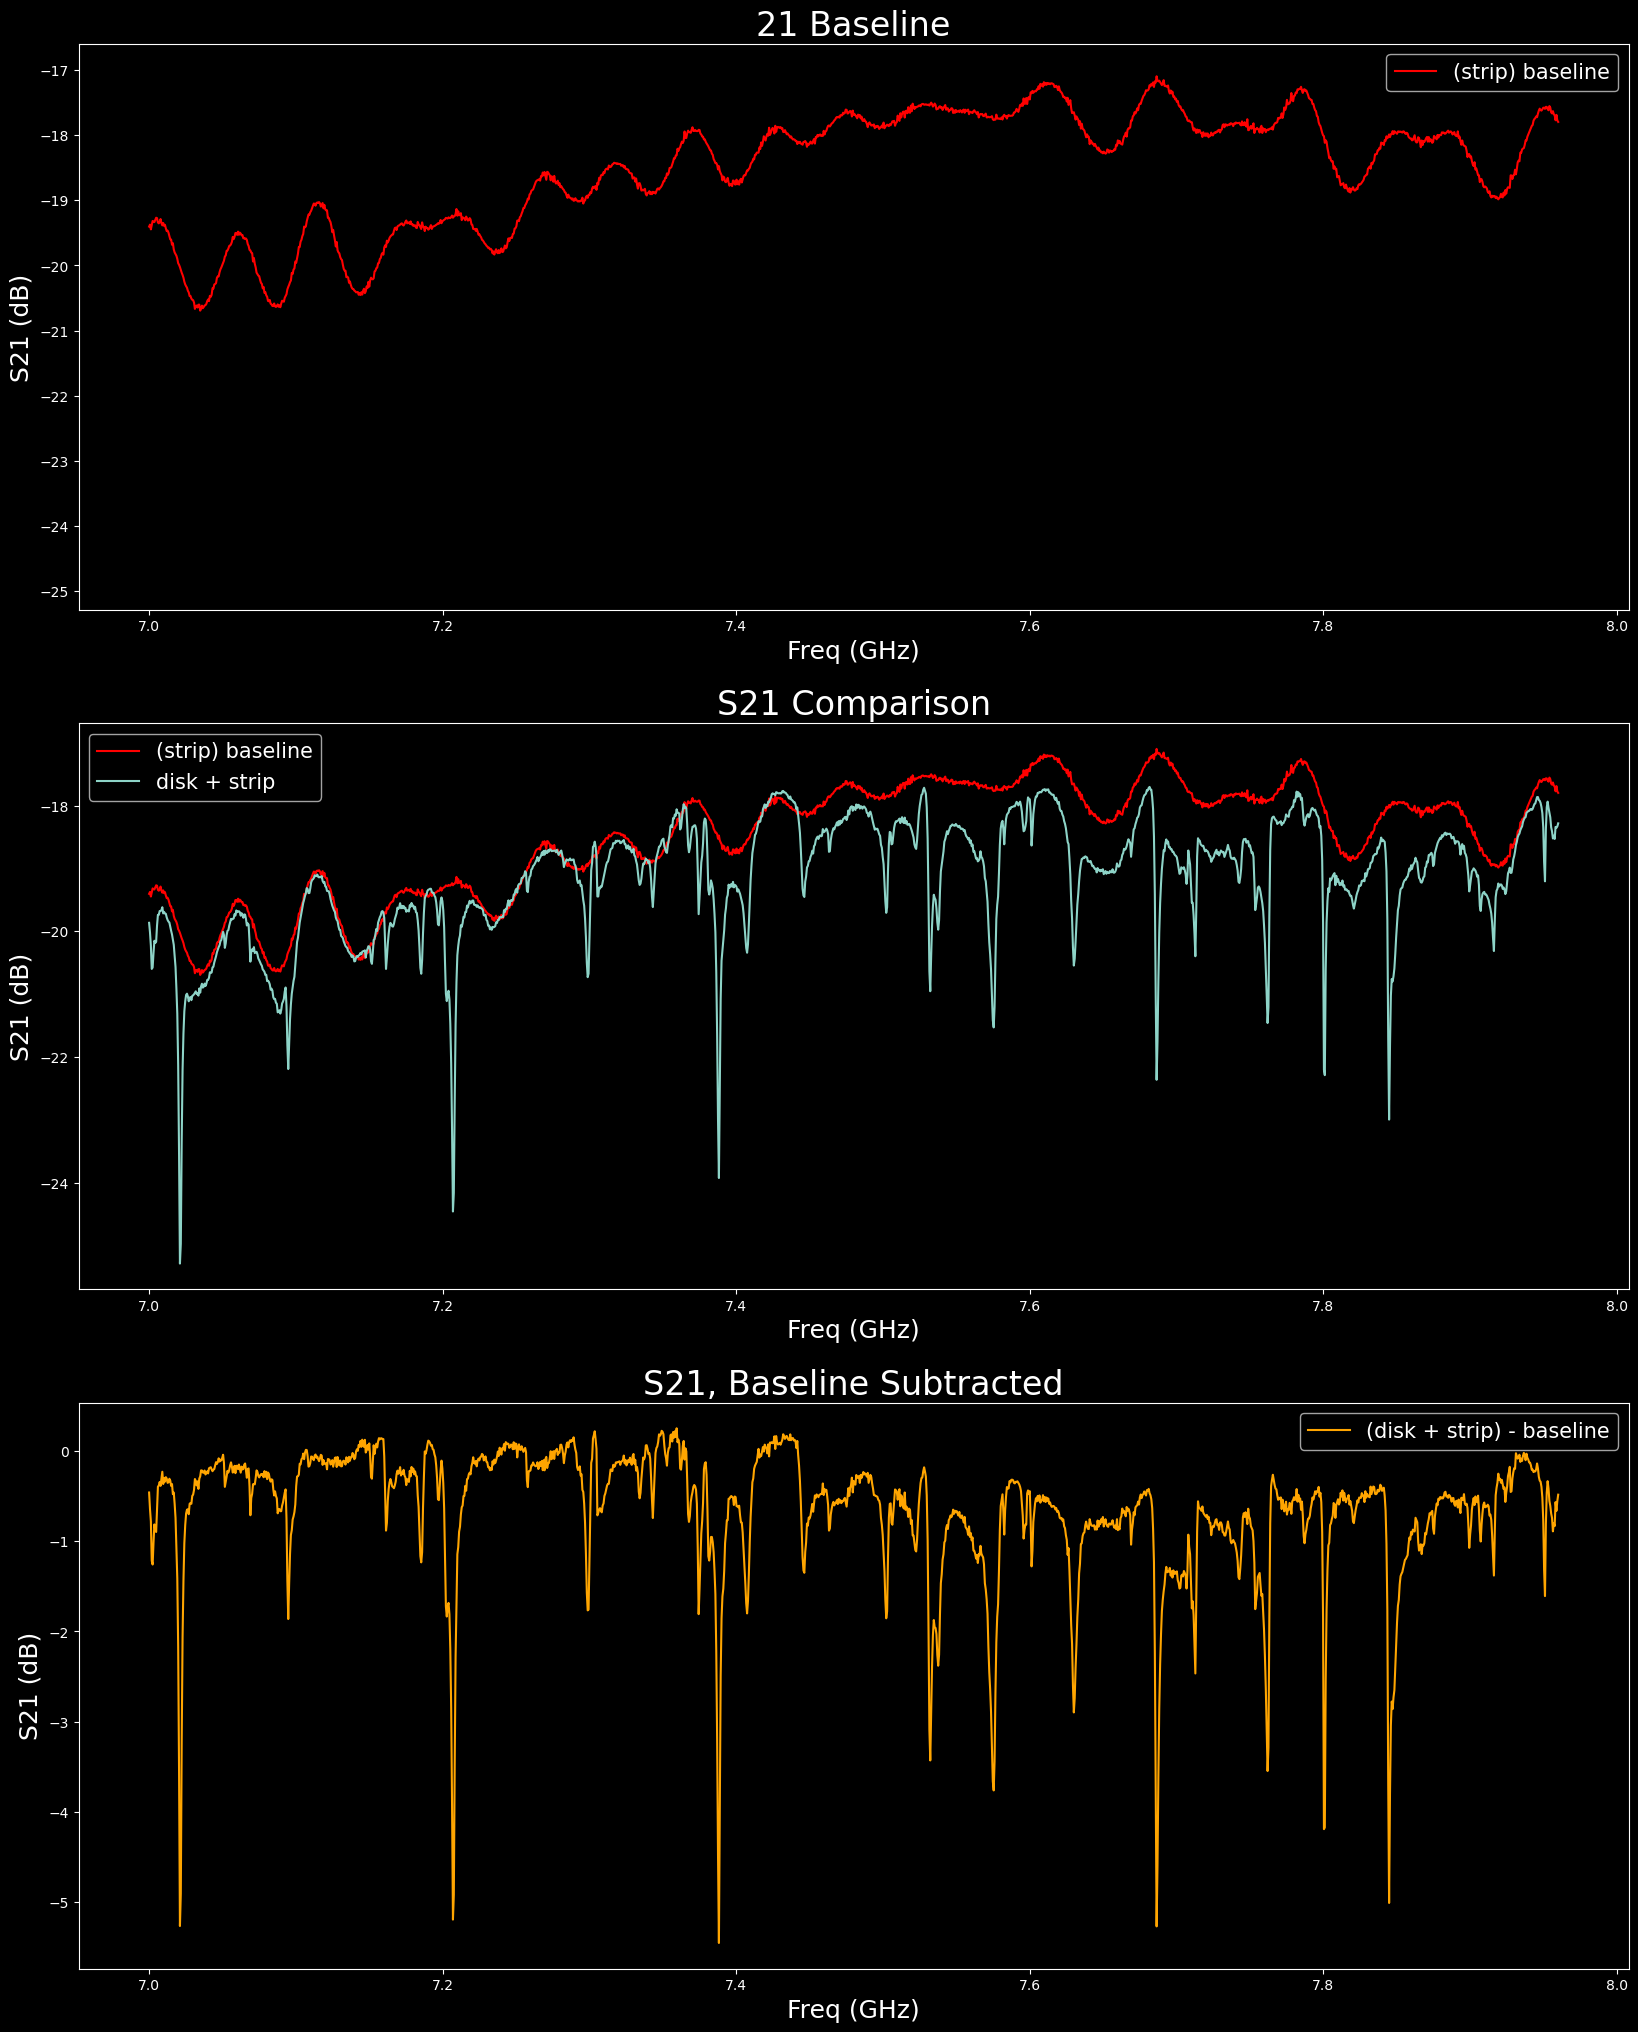

In [28]:
plotter(BL_7p0_7p96, disk_7p0_7p96)

7960000000.0 to 9080000000.0


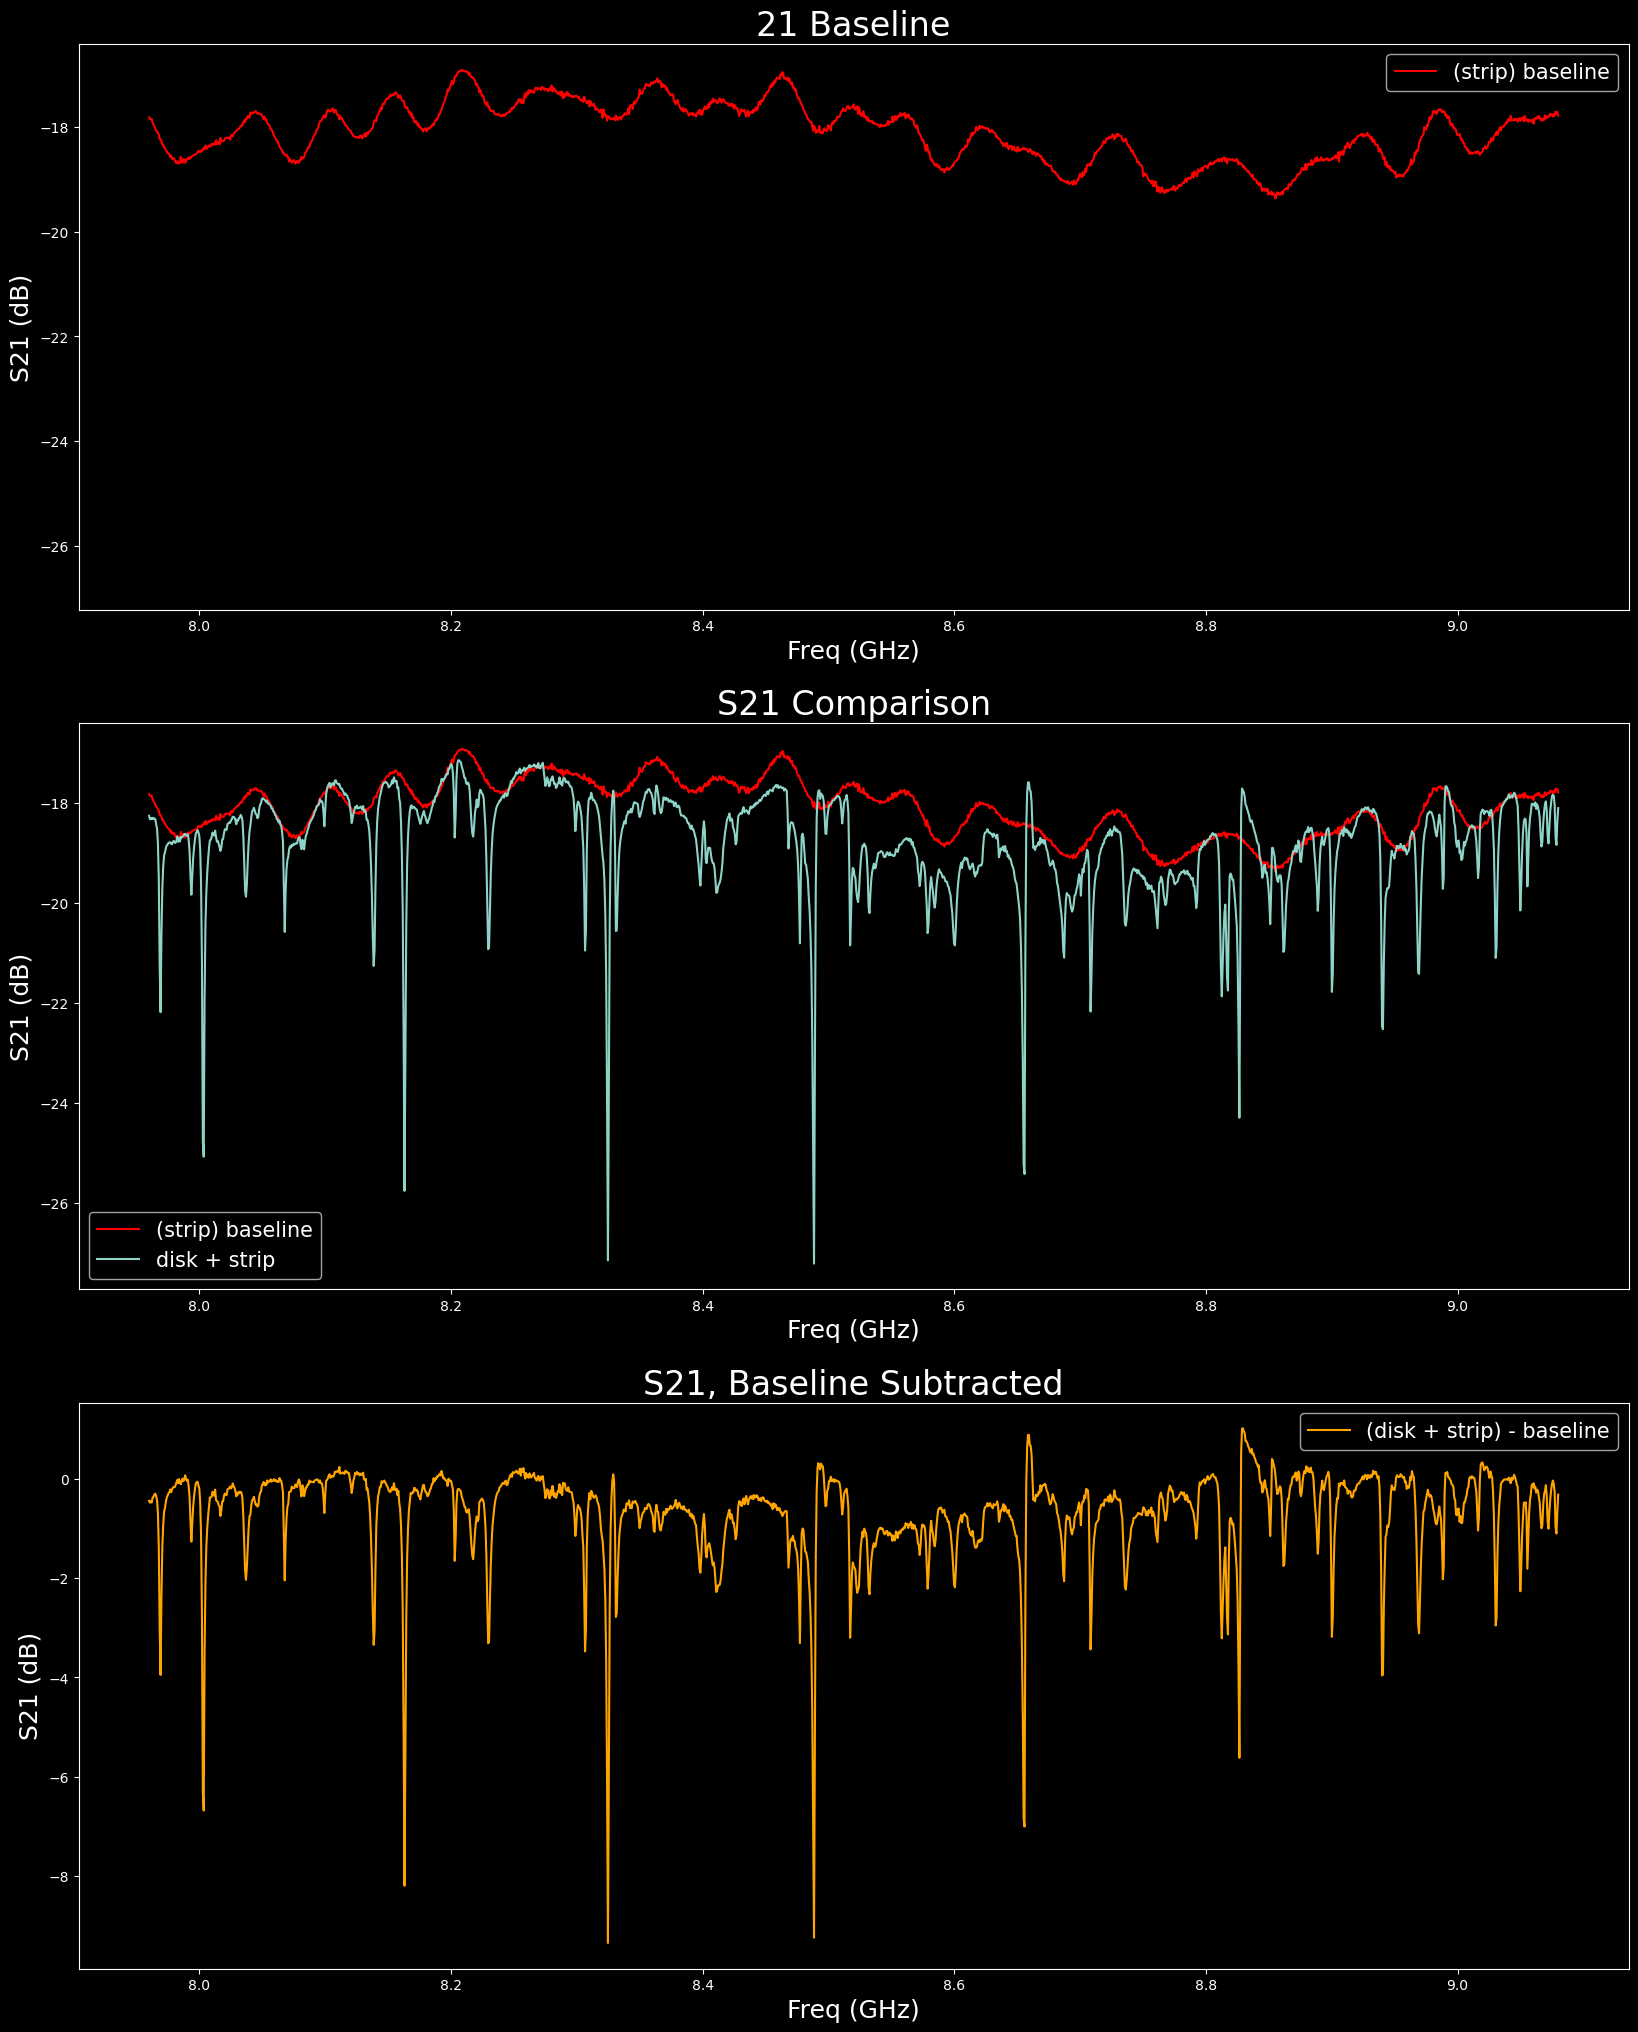

In [29]:
plotter(BL_7p96_9p08, disk_7p96_9p08)

9080000000.0 to 9880000000.0


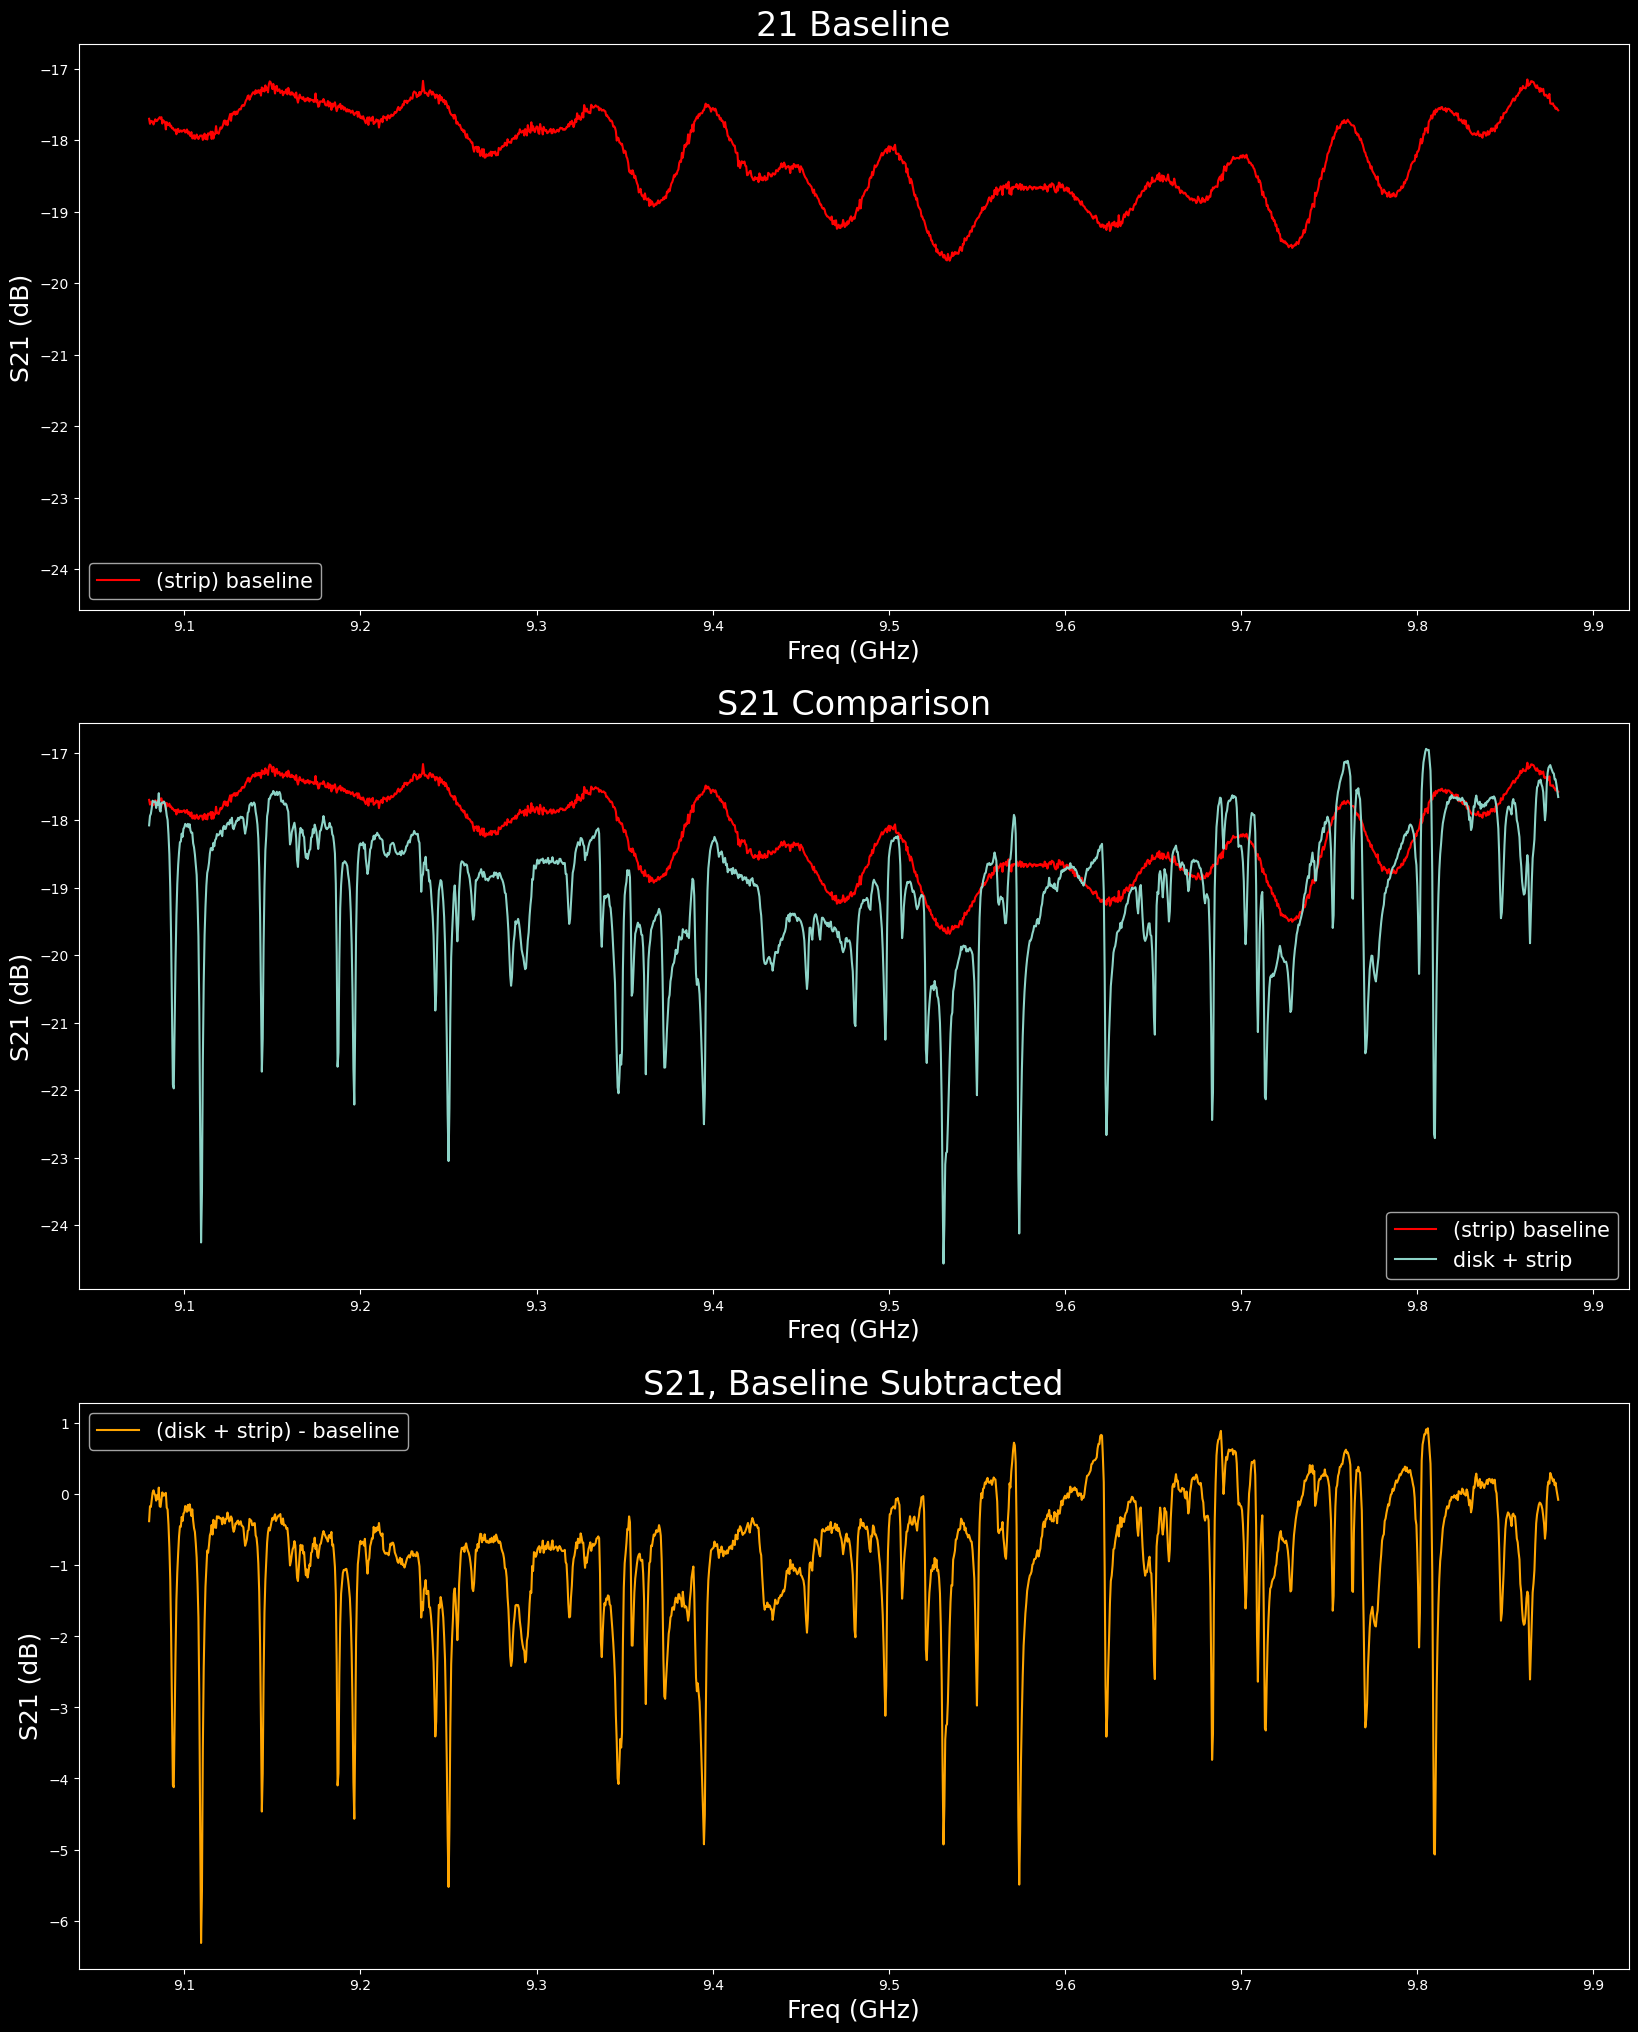

In [30]:
plotter(BL_9p08_9p88, disk_9p08_9p88)